## PROYECTO FINAL: Entrenamiento y optimización de modelos de Machine Learning

- Proyecto: Robos y recuperos de autos en Argentina en 2022 y 2023
- Alumna: Gimena Sozzi
- Curso: Data Science
- Comisión: 49140

## 1. Introducción ##

**1.1. Abstract del Proyecto**

Este estudio se enfoca en el análisis de los robos de autos en Argentina durante los años 2022 y 2023. La motivación es proporcionar insights clave para entidades como autoridades de seguridad, compañías de seguros y propietarios de vehículos en Argentina, con el objetivo de desarrollar estrategias efectivas para prevenir y responder a estos incidentes. La audiencia principal incluye analistas de datos, funcionarios de seguridad pública y profesionales del sector asegurador en Argentina.

**1.2. Descripción del Dataset** 

El dataset utilizado consta de 83,834 registros y 25 características distintas, proporcionados por la Dirección Nacional de Registros Nacionales de la Propiedad Automotor y Créditos Prendarios del Ministerio de Justicia y Derechos Humanos de Argentina (Durante los años 2022 y 2023) https://datos.gob.ar/dataset/justicia-robos-recuperos-autos

Las características incluidas en el dataset son:

- `tramite_tipo`, `tramite_fecha`: Información sobre el tipo y la fecha del trámite.
- `fecha_inscripcion_inicial`: Fecha original de inscripción del vehículo.
- `registro_seccional_codigo`, `registro_seccional_descripcion`, `registro_seccional_provincia`: Datos del registro del vehículo.
- `automotor_origen`, `automotor_anio_modelo`, `automotor_marca_codigo`, `automotor_marca_descripcion`, `automotor_modelo_codigo`, `automotor_modelo_descripcion`: Detalles específicos del automotor.
- `automotor_tipo_codigo`, `automotor_tipo_descripcion`: Clasificación del tipo de vehículo.
- `automotor_uso_codigo`, `automotor_uso_descripcion`: Uso del vehículo según registro.
- `titular_tipo_persona`, `titular_domicilio_localidad`, `titular_domicilio_provincia`, `titular_genero`, `titular_anio_nacimiento`: Información sobre el titular del vehículo.
- `titular_pais_nacimiento`, `titular_porcentaje_titularidad`: Nacionalidad del titular y porcentaje de titularidad.
- `titular_domicilio_provincia_id`, `titular_pais_nacimiento_id`: IDs codificados de la provincia y país de nacimiento del titular.

Estas características proporcionan una visión integral de los factores que podrían influir en el robo de vehículos, desde detalles específicos del automotor y su uso hasta información demográfica y de registro del titular.


**1.3. Definición del Objetivo**

El objetivo principal de este estudio es identificar patrones y tendencias en los robos de autos en Argentina. Utilizando técnicas avanzadas de análisis de datos y machine learning, buscamos comprender mejor este fenómeno y sus dinámicas subyacentes. Al revelar estos patrones, el proyecto aspira a contribuir significativamente a la creación y optimización de medidas preventivas más efectivas. Esta investigación no solo proporcionará insights valiosos para las autoridades y las compañías de seguros, sino que también ayudará a proteger mejor a los ciudadanos y sus propiedades. La meta es transformar estos insights en estrategias y recomendaciones basadas en datos, que puedan ser implementadas para reducir la incidencia y el impacto de los robos de vehículos en la región.

**1.4. Formulación de Preguntas e Hipótesis**

a) Pregunta: ¿Cuáles son los modelos y marcas de autos más frecuentemente robados en Argentina durante 2022 y 2023?

Hipótesis: Los autos de ciertas marcas y modelos específicos son más propensos a ser robados, posiblemente debido a su mayor valor en el mercado o a su demanda en el mercado negro.

b) Pregunta: ¿Existe una variación significativa en la incidencia de robos de autos entre las diferentes provincias argentinas?

Hipótesis: Las provincias con mayores centros urbanos, como Buenos Aires y Córdoba, tienen tasas más altas de robo de autos debido a su mayor densidad de población y actividad económica.

c) Pregunta: ¿Cómo varían los robos de autos a lo largo del año? ¿Hay meses específicos con mayor incidencia?

Hipótesis: Los robos de autos podrían aumentar en ciertos meses debido a factores estacionales, como vacaciones o festividades, cuando los autos pueden quedar más tiempo sin vigilancia.

d) Pregunta: ¿Hay alguna correlación entre el año del modelo del auto y la frecuencia de robo?

Hipótesis: Los autos de modelos más recientes podrían ser más propensos a robos, presumiblemente por su mayor valor de reventa.


**1.5. Contexto Comercial y Problema Comercial**

En Argentina, los robos de autos representan un problema significativo que impacta no solo a individuos sino también a la economía y la seguridad pública. Para las compañías de seguros, estos incidentes resultan en mayores reclamaciones y, por ende, en un aumento en las primas de seguros. Para la policía, es un desafío que requiere una asignación eficiente de recursos.

**1.6. Contexto Analítico**

Este análisis se enmarca en un contexto analítico que busca comprender las dinámicas detrás de los robos de autos en Argentina, empleando herramientas estadísticas y de visualización de datos para identificar tendencias y patrones clave.

## 2. Exploración de Datos Inicial ##


En esta sección, realizaremos una exploración inicial de nuestro dataset de robos de autos en Argentina durante los años 2022 y 2023. El objetivo es obtener una comprensión general de la estructura de los datos, identificar posibles problemas de calidad (como valores faltantes o atípicos) y entender mejor la distribución y tendencias de los incidentes reportados. Comenzaremos con algunas estadísticas descriptivas básicas, seguidas de visualizaciones para explorar la distribución de los años de modelo de los automotores y la frecuencia de robos por provincia.


**2.1. Importaciones para manejo de datos y visualización y carga del dataset**

In [1]:
# Importación de paquetes y librerías
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

# Librerías de scikit-learn para modelos y evaluación
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Librerías adicionales
import time
import re
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
# Carga del dataset sobre robos de automóviles en Argentina (2022-2023)
df_robos_autos = pd.read_csv('dataset_robos_autos_2022_2023.csv', encoding='latin1')

C:\Users\MegaTecnologia\AppData\Local\Temp\ipykernel_26132\3052754811.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_robos_autos = pd.read_csv('dataset_robos_autos_2022_2023.csv', encoding='latin1')


**2.2. Estadísticas Descriptivas Básicas**

2.2.1. Lectura y exploración inicial del dataset

In [3]:
# Imprimir el tamaño original del dataset (filas, columnas)
print(f'El tamaño original del dataset es (filas, columnas):\n{df_robos_autos.shape}')

El tamaño original del dataset es (filas, columnas):
(83834, 25)


In [4]:
# Mostrar las primeras 5 filas del dataset para observar la organización de los datos y el tipo de información en cada columna
df_primeras_5 = df_robos_autos.head()
print(f'Primeras 5 filas del dataset:\n{df_primeras_5}')

Primeras 5 filas del dataset:
                                    tramite_tipo tramite_fecha  \
0  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-18   
1  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-31   
2  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-11   
3  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-10   
4  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-24   

  fecha_inscripcion_inicial  registro_seccional_codigo  \
0                1994-06-03                       1173   
1                2000-10-27                       1120   
2                1994-04-28                       2086   
3                1992-03-27                       1119   
4                2000-11-01                       1118   

  registro_seccional_descripcion registro_seccional_provincia  \
0              BERAZATEGUI NÂº 2                 Buenos Aires   
1              LA MATANZA NÂº 03                 Buenos Aires   
2        CAPITAL FEDERAL NÂº 

In [5]:
# Identificar tipos de datos y presencia de valores nulos en el dataset
print(f'Información general del dataset:')
df_robos_autos.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83834 entries, 0 to 83833
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tramite_tipo                    83834 non-null  object 
 1   tramite_fecha                   83834 non-null  object 
 2   fecha_inscripcion_inicial       83833 non-null  object 
 3   registro_seccional_codigo       83834 non-null  int64  
 4   registro_seccional_descripcion  83834 non-null  object 
 5   registro_seccional_provincia    83834 non-null  object 
 6   automotor_origen                83834 non-null  object 
 7   automotor_anio_modelo           83660 non-null  float64
 8   automotor_tipo_codigo           81435 non-null  object 
 9   automotor_tipo_descripcion      83834 non-null  object 
 10  automotor_marca_codigo          82802 non-null  object 
 11  automotor_marca_descripcion     83834 non-null  object 
 12 

In [6]:
# Obtener una descripción estadística de las columnas numéricas para identificar distribuciones, posibles valores atípicos y errores en los datos.
df_descripcion = df_robos_autos.describe()
print(f'Descripción estadística de las columnas numéricas:\n{df_descripcion}')

Descripción estadística de las columnas numéricas:
       registro_seccional_codigo  automotor_anio_modelo  automotor_uso_codigo  \
count               83834.000000           83660.000000          83831.000000   
mean                 3415.922764            2007.051685              1.009805   
std                  5176.869866              33.200848              0.238237   
min                  1001.000000              20.000000              0.000000   
25%                  1161.000000            2001.000000              1.000000   
50%                  1253.000000            2009.000000              1.000000   
75%                  2065.000000            2013.000000              1.000000   
max                 24008.000000            2023.000000              9.000000   

       titular_anio_nacimiento  titular_porcentaje_titularidad  \
count             83820.000000                    83834.000000   
mean               1978.439621                       97.713684   
std                  

**2.3. Visualizaciones Iniciales**

2.3.1. Histograma de los años de modelos de los automotores robados

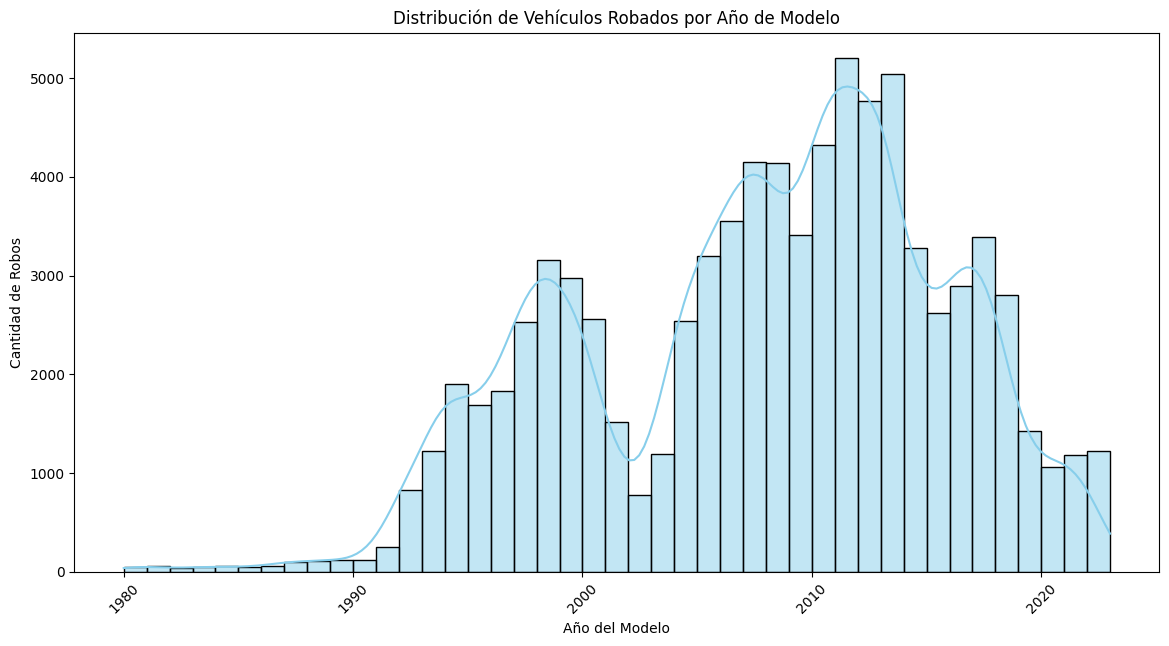

In [7]:
# Filtrar datos para asegurar años de modelo razonables
df_robos_autos_filtered = df_robos_autos[(df_robos_autos['automotor_anio_modelo'] >= 1980) & (df_robos_autos['automotor_anio_modelo'] <= 2023)]

# Crear y visualizar un histograma de la distribución de vehículos robados por año de modelo
plt.figure(figsize=(14, 7))
sns.histplot(df_robos_autos_filtered['automotor_anio_modelo'], bins=43, kde=True, color="skyblue")
plt.title('Distribución de Vehículos Robados por Año de Modelo')
plt.xlabel('Año del Modelo')
plt.ylabel('Cantidad de Robos')
plt.xticks(rotation=45)

# Guardar el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_hist_anios_modelos.png') 

# Mostrar el gráfico
plt.show()

El siguiente histograma muestra la distribución de los vehículos robados según su año de modelo. Se observa una tendencia en la cual los autos cuyos modelos se encuentran entre los años 2010 y 2015 tienen una alta frecuenta de robos. Esta visualización es fundamental para entender la relación entre la antigüedad del vehículo y su vulnerabilidad al robo.

2.3.2. Gráfico de Barras para la Frecuencia de Robos por Provincia

C:\Users\MegaTecnologia\AppData\Local\Temp\ipykernel_26132\335528480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_counts.values, y=provincia_counts.index, palette="Blues_d")


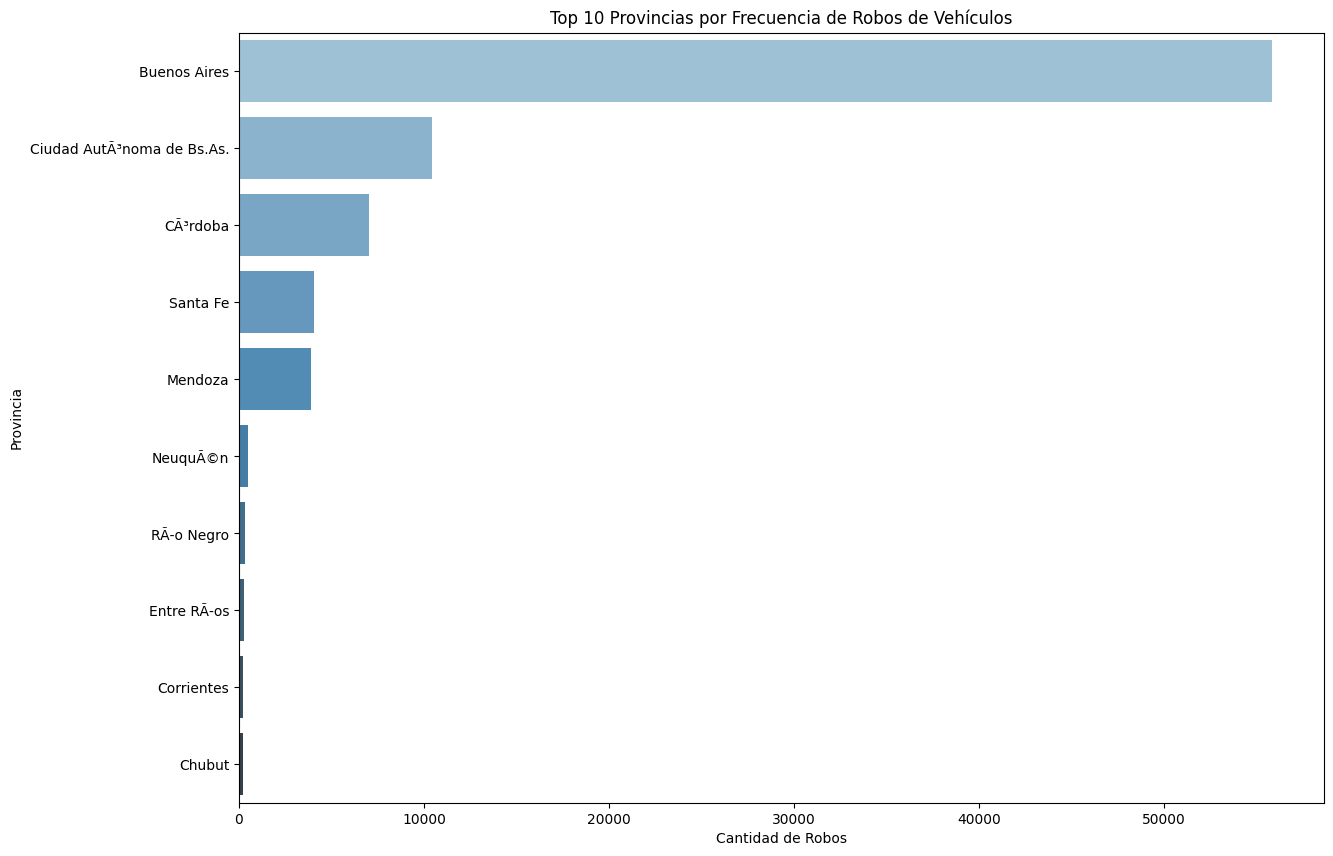

In [8]:
# Generar el gráfico de barras para las top 10 provincias con más robos
plt.figure(figsize=(14, 10))
provincia_counts = df_robos_autos['registro_seccional_provincia'].value_counts().head(10)  # Ajusta el nombre de la columna si es necesario
sns.barplot(x=provincia_counts.values, y=provincia_counts.index, palette="Blues_d")
plt.title('Top 10 Provincias por Frecuencia de Robos de Vehículos')
plt.xlabel('Cantidad de Robos')
plt.ylabel('Provincia')


# Guardar el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_barras_frec_robos_prov.png') 

# Mostrar el gráfico
plt.show()

El gráfico de barras siguiente destaca las 10 provincias con la mayor cantidad de robos de vehículos reportados. Se puede apreciar que Buenos Aires y Ciudad Autónoma de Buenos Aires se destacan por una alta frecuencia de incidentes.

## 3. Preprocesamiento de Datos ##

<Axes: >

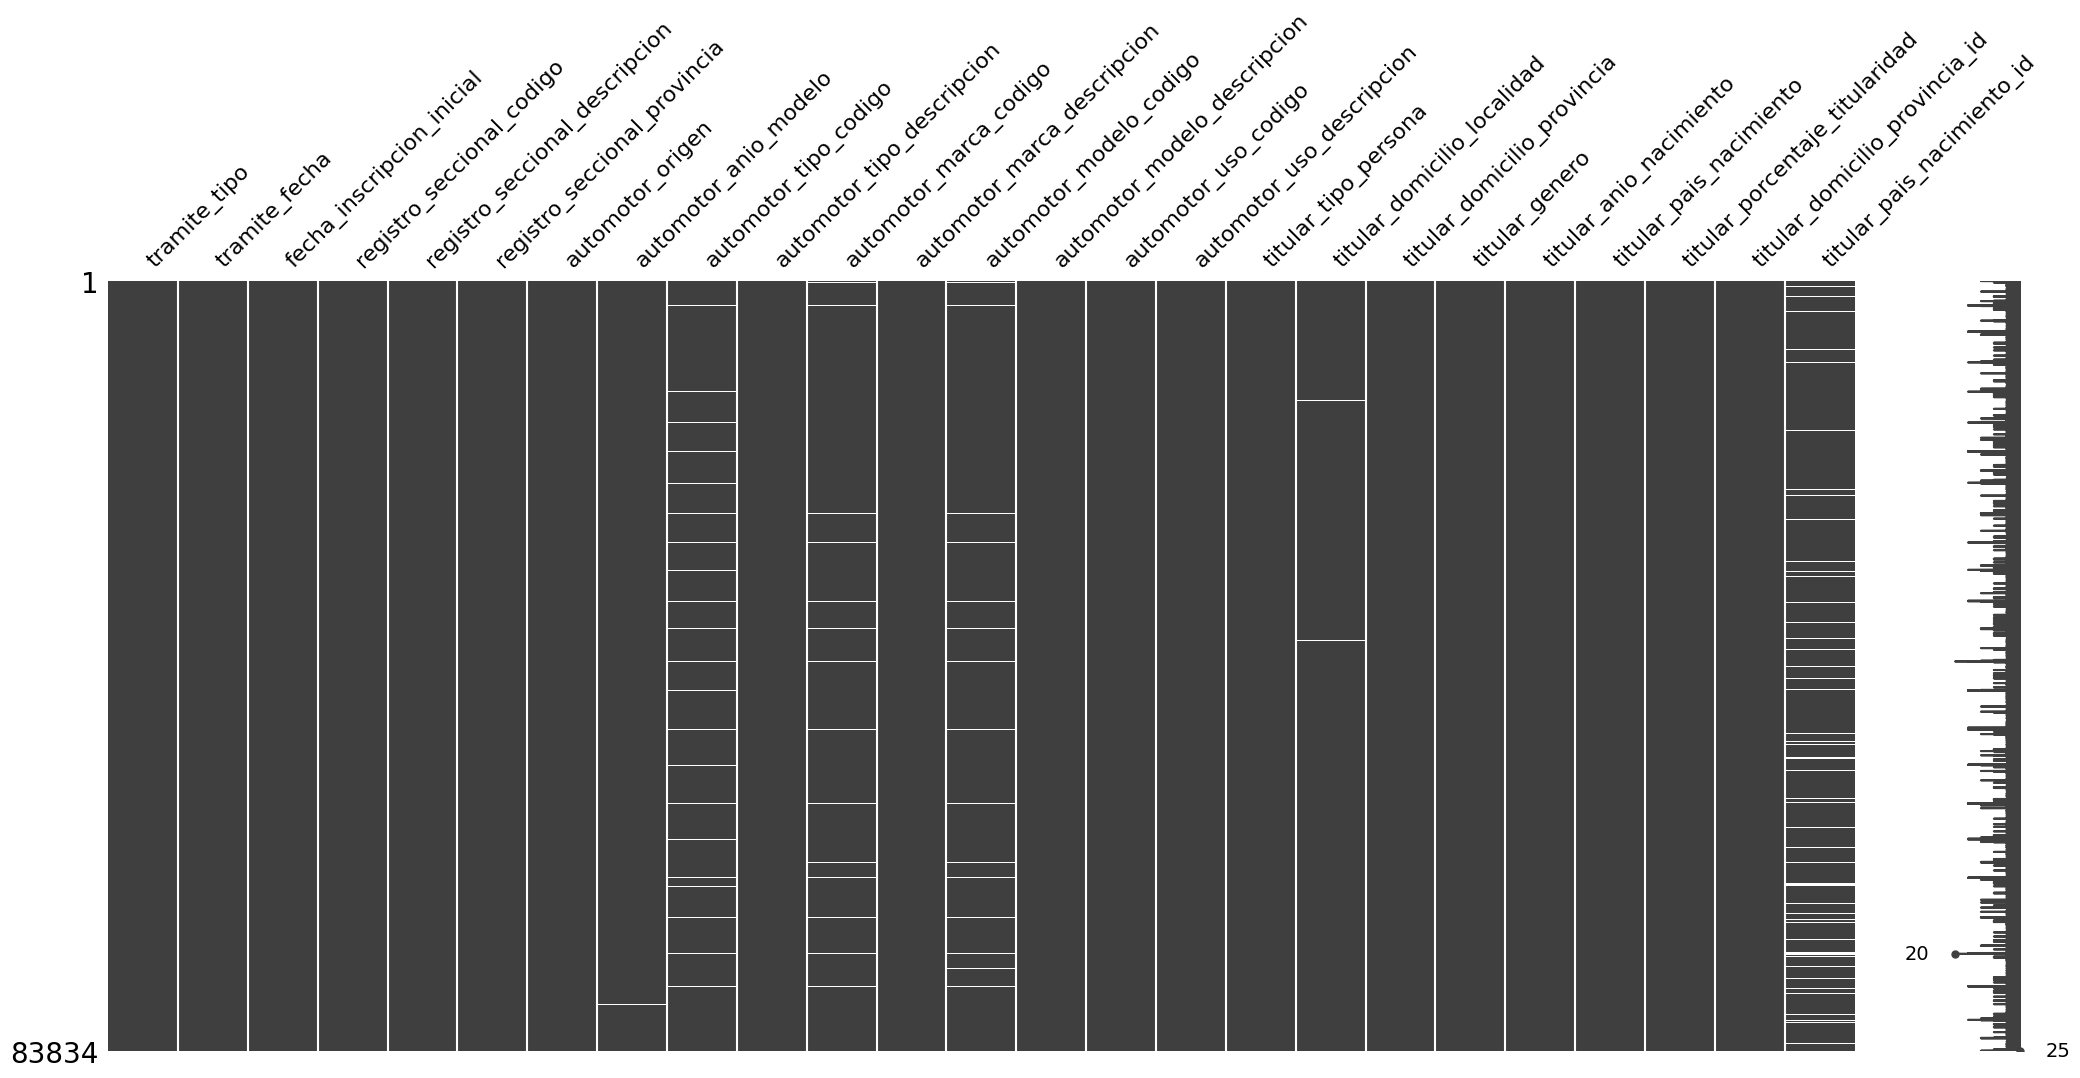

In [9]:
# Visualizar la matriz de datos faltantes en el dataset
msno.matrix(df_robos_autos)

**3.1. Detección y limpieza de duplicados**

In [10]:
# Identificar y contar los registros duplicados en el dataset
duplicados = df_robos_autos.duplicated().sum()
print(f'Registros duplicados:\n{duplicados}')

Registros duplicados:
0


No hay registros duplicados en este df.

**3.2. Detección y manejo de valores nulos**

In [11]:
# Contar y mostrar los valores nulos en cada columna para identificar las columnas con datos faltantes
valores_nulos = df_robos_autos.isnull().sum()
print(f'Valores nulos por columna:\n{valores_nulos[valores_nulos > 0]}')

Valores nulos por columna:
fecha_inscripcion_inicial         1
automotor_anio_modelo           174
automotor_tipo_codigo          2399
automotor_marca_codigo         1032
automotor_modelo_codigo        1162
automotor_uso_codigo              3
automotor_uso_descripcion         3
titular_domicilio_localidad      85
titular_anio_nacimiento          14
titular_pais_nacimiento_id     4750
dtype: int64


La cantidad de datos nulos en estas columnas es relativamente pequeña en comparación con el tamaño del dataset. Por lo tanto, la eliminación de estos registros tiene un impacto mínimo en la cantidad de datos disponibles para el análisis.

In [12]:
# Eliminar filas con valores nulos en las columnas críticas para el análisis
df_robos_autos = df_robos_autos.dropna(subset=['fecha_inscripcion_inicial', 'automotor_anio_modelo', 'automotor_tipo_codigo', 'automotor_marca_codigo', 'automotor_modelo_codigo', 'automotor_uso_codigo', 'automotor_uso_descripcion', 'titular_domicilio_localidad', 'titular_anio_nacimiento', 'titular_pais_nacimiento_id'])

In [13]:
# Verificar la eliminación de valores nulos después de la limpieza de datos
valores_nulos_post_limpieza = df_robos_autos.isnull().sum()
print(f'Valores nulos por columna post limpieza:\n{valores_nulos_post_limpieza[valores_nulos_post_limpieza >= 0]}')

Valores nulos por columna post limpieza:
tramite_tipo                      0
tramite_fecha                     0
fecha_inscripcion_inicial         0
registro_seccional_codigo         0
registro_seccional_descripcion    0
registro_seccional_provincia      0
automotor_origen                  0
automotor_anio_modelo             0
automotor_tipo_codigo             0
automotor_tipo_descripcion        0
automotor_marca_codigo            0
automotor_marca_descripcion       0
automotor_modelo_codigo           0
automotor_modelo_descripcion      0
automotor_uso_codigo              0
automotor_uso_descripcion         0
titular_tipo_persona              0
titular_domicilio_localidad       0
titular_domicilio_provincia       0
titular_genero                    0
titular_anio_nacimiento           0
titular_pais_nacimiento           0
titular_porcentaje_titularidad    0
titular_domicilio_provincia_id    0
titular_pais_nacimiento_id        0
dtype: int64


In [14]:
# Actualizar y mostrar el tamaño del dataset después de eliminar los valores nulos en las columnas identificadas
print(f'Tamaño del dataset después de eliminar los valores nulos en las columnas identificadas:\n{df_robos_autos.shape}')

Tamaño del dataset después de eliminar los valores nulos en las columnas identificadas:
(76386, 25)


**3.3. Análisis y transformación de tipos de datos**

In [15]:
# Revisar y mostrar los tipos de datos actuales antes de realizar cualquier transformación
print(f'Tipos de datos antes de la transformación:\n{df_robos_autos.dtypes}')

Tipos de datos antes de la transformación:
tramite_tipo                       object
tramite_fecha                      object
fecha_inscripcion_inicial          object
registro_seccional_codigo           int64
registro_seccional_descripcion     object
registro_seccional_provincia       object
automotor_origen                   object
automotor_anio_modelo             float64
automotor_tipo_codigo              object
automotor_tipo_descripcion         object
automotor_marca_codigo             object
automotor_marca_descripcion        object
automotor_modelo_codigo            object
automotor_modelo_descripcion       object
automotor_uso_codigo              float64
automotor_uso_descripcion          object
titular_tipo_persona               object
titular_domicilio_localidad        object
titular_domicilio_provincia        object
titular_genero                     object
titular_anio_nacimiento           float64
titular_pais_nacimiento            object
titular_porcentaje_titularidad   

Vamos a transformar los tipos de datos de las columnas 'automotor_anio_modelo', 'automotor_uso_codigo' y 'titular_anio_nacimiento' de float a int porque el año es ineherentemente un valor entero, ya que no puede haber una fracción de año en este contexto. 

También, vamos a transformar las columnas de 'fecha_inscripcion_inicial' y 'tramite_fecha' de object (string) a datetime.

Los tipos de datos correctos simplifican las operaciones y comparaciones.

In [16]:
# Transformar el tipo de dato de las columnas 'automotor_anio_modelo', 'automotor_uso_codigo' y 'titular_anio_nacimiento' a tipo "int" para facilitar el análisis
df_robos_autos['automotor_anio_modelo'] = df_robos_autos['automotor_anio_modelo'].astype(int)
df_robos_autos['automotor_uso_codigo'] = df_robos_autos['automotor_uso_codigo'].astype(int)
df_robos_autos['titular_anio_nacimiento'] = df_robos_autos['titular_anio_nacimiento'].astype(int)


In [17]:
# Confirmar la transformación y mostrar los nuevos tipos de datos
print('Tipos de datos después de la transformación:')
print(df_robos_autos.dtypes['automotor_anio_modelo'])
print(df_robos_autos.dtypes['automotor_uso_codigo'])
print(df_robos_autos.dtypes['titular_anio_nacimiento'])

Tipos de datos después de la transformación:
int32
int32
int32


In [18]:
# Transformar el tipo de dato de las columnas 'fecha_inscripcion_inicial' y 'tramite_fecha'a tipo "datetime" para facilitar el análisis temporal
df_robos_autos['fecha_inscripcion_inicial'] = pd.to_datetime(df_robos_autos['fecha_inscripcion_inicial'], errors='coerce')
df_robos_autos['tramite_fecha'] = pd.to_datetime(df_robos_autos['tramite_fecha'], errors='coerce')

In [19]:
# Confirmar la transformación y mostrar los nuevos tipos de datos
print('Tipos de datos después de la transformación:')
print(df_robos_autos.dtypes['fecha_inscripcion_inicial'])
print(df_robos_autos.dtypes['tramite_fecha'])

Tipos de datos después de la transformación:
datetime64[ns]
datetime64[ns]


**3.4. Borrado o transformación de columnas irrelevantes o redundantes**

Observando la estructura del dataset, identificamos columnas con información redundante tales como 'titular_domicilio_provincia_id' y 'titular_pais_nacimiento_id' y no aportan valor adicional, por lo que ya tenemos 'titular_domicilio_provincia' y 'titular_pais_nacimiento'. Por lo tanto, vamos a proceder a la elimación de las mismas.

In [20]:
# Eliminar las columnas con información redundante 'titular_domicilio_provincia_id' y 'titular_pais_nacimiento_id' para simplificar el dataset
columnas_a_eliminar = ['titular_domicilio_provincia_id', 'titular_pais_nacimiento_id']
df_robos_autos = df_robos_autos.drop(columns=columnas_a_eliminar)

In [21]:
# Verificar el dataset después de la eliminación de columnas, imprimiendo las primeras 5 filas
df_primeras_5_post = df_robos_autos.head()
print(df_primeras_5_post)

                                     tramite_tipo tramite_fecha  \
44  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-25   
45  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-27   
46  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-26   
47  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-07   
48  DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA    2022-01-17   

   fecha_inscripcion_inicial  registro_seccional_codigo  \
44                2000-02-02                       2043   
45                2009-12-28                       2043   
46                1999-10-15                       1183   
47                2000-01-28                       1185   
48                2008-02-08                       1146   

   registro_seccional_descripcion registro_seccional_provincia  \
44        CAPITAL FEDERAL NÂº 043   Ciudad AutÃ³noma de Bs.As.   
45        CAPITAL FEDERAL NÂº 043   Ciudad AutÃ³noma de Bs.As.   
46                  OLIVOS NÂº 06           

In [22]:
# Mostrar los valores únicos en la columna 'automotor_tipo_descripcion' para identificar variantes en las descripciones
tipos_de_autos_unicos = df_robos_autos['automotor_tipo_descripcion'].unique()
sorted(tipos_de_autos_unicos)

['12',
 '12 - SEDAN 4 PUERTAS',
 '17 - SEDAN 5 PUERTAS',
 '2 PUERTAS',
 '3 PUERTAS',
 '348 - FOX 1.6',
 '5 PTAS',
 '5 PUERTAS',
 'ACOPLADO',
 'AMBULANCIA',
 'ARENERO',
 'AUTOMOVIL',
 'AUTOMOVIL 4 PTAS',
 'BERLINA',
 'BERLINA  5 PUERTAS',
 'BERLINA 3 PT AA',
 'BERLINA 3 PTAS',
 'BERLINA 3 PTAS.',
 'BERLINA 3 PUERTAS',
 'BERLINA 3 PUERTAS AA',
 'BERLINA 3PTAS',
 'BERLINA 4 PUERTAS',
 'BERLINA 5 PTAS',
 'BERLINA 5 PTAS.',
 'BERLINA 5 PUERTAS',
 'BREACK 4 PUERTAS',
 'BREAK',
 'BREAK 4 PUERTAS',
 'BREAK 4/5 PTAS',
 'C/ CAB. CON PORT. VOLQUETE',
 'CABINA SIMPLE C/ CAJA VOL',
 'CAJA  MUDANCERA',
 'CAJA ABIERTA MUDANCERA',
 'CAJA CERRADA ISOTERMICA C/F',
 'CAJA PLAYA C/HIDROGRUA',
 'CAM BALANCIN C/CAJA TERM',
 'CAMION',
 'CAMION C/ HIDROGRUA',
 'CAMION C/CABINA DORMITORIO',
 'CAMION C/CAJA CARGAS GRALES',
 'CAMION C/CAJA TERM.Y EQ.FRIO',
 'CAMION C/CAJA VOLCADORA',
 'CAMION C/CJA TERM. Y EQ.FRIO',
 'CAMION C/EQ PORTA ROLL OFF',
 'CAMION C/HIDROGRUA Y CAJA P.',
 'CAMION C/PLANCHA P/REMOLQUE',
 

In [23]:
# Definir una función para estandarizar las descripciones de la columna 'automotor_tipo_descripcion'.
def estandarizacion_tipo_auto(descripcion):
    if pd.isnull(descripcion):
        return descripcion # Mantener las descripciones nulas.
    
    # Convertir a cadenas de texto en mayúsculas todas las descripciones.
    descripcion = str(descripcion).upper() 
    
    # Reglas para unificar las descripciones bajo categorias específicas
    if any(termino in descripcion for termino in ['3 PTAS', '3 PUERTAS', '3PTAS', 'TRES PUERTAS', 'DESCAPOTABLE', 'COUPE']):
        return '3 PUERTAS'
    elif any(termino in descripcion for termino in ['SEDAN', 'BERLINA', '4 PTAS', '4 PUERTAS', '4PTAS', 'CUATRO PUERTAS']):
        return '4 PUERTAS'
    elif any(termino in descripcion for termino in ['HATCHBACK', 'ST WAGON', 'STATION WAGON', 'UTILITARIO 4X4 5 PUERTAS', 'R 5 PUERTAS', 'RURAL', '5 PTAS', '5 PUERTAS', '5PTAS', 'CINCO PUERTAS']):
        return '5 PUERTAS'
    elif any(termino in descripcion for termino in ['FURGON', 'FOURGON', 'FURGONETA', 'UTILITARIO', 'UTILITARO', 'FURGONTERMICOC/EQUIPFRIO', 'FURG', 'CAJA MUDANCERA' ]):
        return 'FURGON'
    elif any(termino in descripcion for termino in ['PICK', 'CAMIONETA']):
        return 'PICK-UP'
    elif any(termino in descripcion for termino in ['MINIBUS', 'MIDIBUS', 'MICROOMNIBUS']):
        return 'MINIBUS'
    elif any(termino in descripcion for termino in ['T TERRENO', 'TT', 'TODO TERRENO', 'JEEP', 'ARENERO']):
        return 'TODO TERRENO'
    elif any(termino in descripcion for termino in [
        'TRAN. DE CARGA', 'TRANS. DE PASAJEROS', 'TRANS.DE PASAJEROS', 'TRANSP. DE PASAJEROS',
        'TRANSP.DE PASAJEROS', 'TRANSPORTE DE AUTOMOTORES', 'TRANSPORTE DE CARGA', 
        'TRANSPORTE DE PASAJEROS', 'TRANSPORTE ESCOLAR', 'VAN', 'VAN FAMILIAR', 
        'VIDRIADA C/ASIENTOS', 'COMBI', 'FAMILIAR']):
        return 'VAN'
    elif any(termino in descripcion for termino in [
        'CAMION', 'CHASIS', 'CHASIS C/CABINA', 'CAM BALANCIN C/CAJA TERM', 'SEMIRREMOLQUE']):
        return 'CAMION'
    
    else:
        return 'OTRO TIPO'

In [24]:
# Aplicar la función de estandarización a la columna 'automotor_tipo_descripcion'
df_robos_autos['automotor_tipo_descripcion'] = df_robos_autos['automotor_tipo_descripcion'].apply(estandarizacion_tipo_auto)

In [25]:
# Verificar los cambios realizados en la estandarización de las descripciones de tipos de automotores
df_robos_autos['automotor_tipo_descripcion'].value_counts().head(30)

automotor_tipo_descripcion
4 PUERTAS       49307
3 PUERTAS        8776
PICK-UP          6424
5 PUERTAS        4663
FURGON           4490
TODO TERRENO     1357
VAN               527
CAMION            511
OTRO TIPO         257
MINIBUS            74
Name: count, dtype: int64

In [26]:
# Mostrar los valores únicos en la columna 'automotor_marca_descripcion' para identificar variantes en las descripciones
marca_descripcion_unicos = df_robos_autos['automotor_marca_descripcion'].unique()
sorted(marca_descripcion_unicos)

['-024- CHEVROLET',
 '-024-CHEVROLET',
 '-044- FIAT',
 '-044-FIAT',
 '-047- FORD',
 '-047-FORD',
 '-058-HYUNDAI',
 '-112- RENAULT',
 '-112-RENAULT',
 '-136-VOLKSWAGEN',
 '-VOLKSWAGEN',
 '.CHEVROLET',
 '3-STAR',
 '37 - RENAULT',
 'AGRALE',
 'ALFA ROMEO',
 'ASIA',
 'AST-PRA',
 'ASTIVIA',
 'AUDI',
 'B.M.W.',
 'BAIC',
 'BMW',
 'BONANO',
 'C.M.',
 'CHERY',
 'CHEVROELT',
 'CHEVROLET',
 'CHEVROLET (024)',
 'CHRYSLER',
 'CITROEN',
 'CITROÃ\x8bN',
 'COQUITO',
 'CORMETAL',
 'DACIA',
 'DAEWO',
 'DAEWOO',
 'DAIHATSU',
 'DEPAOLI',
 'DEUTZ AGRALE',
 'DEUTZ-AGRALE',
 'DFM',
 'DFSK',
 'DODGE',
 'DS',
 'FIAT',
 'FIAT IVECO',
 'FIAT.',
 'FORD',
 'FOTON',
 'FREIGHTLINER',
 'G.M.C. CHEVETTE',
 'GALLOPER',
 'GAMMA',
 'GAZ',
 'GEELY',
 'GENERAL MOTORS ARGENTINA S. R.  L.',
 'GMC CHEVETTE',
 'GOLONDRINA',
 'GOMATRO',
 'GRASSANI',
 'GUERRA',
 'HAVAL',
 'HELVETICA',
 'HERMANN',
 'HONDA',
 'HYUNDAI',
 'IDEROL',
 'INDUSTRIAS AHT ALZUARTE',
 'INDUTEK',
 'INFINITI',
 'ISUZU',
 'IVECO',
 'JAC',
 'JEEP',
 'KIA',
 'L

In [27]:
# Definir una función para estandarizar las descripciones de la columna 'automotor_marca_descripcion'
def estandarizacion_marca_auto(descripcion):
    if pd.isnull(descripcion):
        return descripcion # Mantiene las descripciones nulas.
    
    # Convertir todas las descripciones a mayúsculas y eliminar espacios extra
    descripcion = str(descripcion).upper().strip()
    
    # Eliminar prefijos/sufijos numéricos y caracteres especiales.
    descripcion = re.sub(r'^[-.0-9\s]+', '', descripcion)
    
    # Eliminar espacios múltiples.
    descripcion = re.sub(r'[\s]+', ' ', descripcion)
    
    # Correcciones específicas para errores comunes y unificación de variantes.
    correcciones = {       
    'CHEVROELT': 'CHEVROLET',
        'CHEVROLET (024)': 'CHEVROLET',
        'B.M.W.': 'BMW',
        'VLOKSWAGEN': 'VOLKSWAGEN',
        'VOKSWAGEN': 'VOLKSWAGEN',
        'VOLKSWAGEN/MARCOPOLO': 'VOLKSWAGEN',
        'VOLKSWAGENVOLKSWAGEN': 'VOLKSWAGEN',
        'VOLKSWAGUEN': 'VOLKSWAGEN',
        'VOLKSWGEN': 'VOLKSWAGEN',
        'VOLKSWWAGEN': 'VOLKSWAGEN',
        'VOLKWAGEN': 'VOLKSWAGEN',
        'VOLSKWAGEN': 'VOLKSWAGEN',
        'VOLSWAGEN': 'VOLKSWAGEN',
        'WOLKSWAGEN': 'VOLKSWAGEN',
        'CITROÃ\x8bN': 'CITROEN',
        'DAEWO': 'DAEWOO',
        'MERCEDES BENZ': 'MERCEDES-BENZ',
        'MERCEDES BENZ.': 'MERCEDES-BENZ',
        'MERCEDES BENZ/COMIL': 'MERCEDES-BENZ',
        'M. BENZ': 'MERCEDEZ-BENZ',
        'OEUGEOT': 'PEUGEOT',
        'PEOGEOT': 'PEUGEOT',
        'PEUGEOT (039)': 'PEUGEOT',
        'PEUIGEOT': 'PEUGEOT',
        'PICASSO': 'CITROEN',
        'PUEGEOT': 'PEUGEOT',
        'REANULT': 'RENAULT',
        'RENAUL': 'RENAULT',
        'RENAUTL': 'RENAULT',
        'G.M.C. CHEVETTE': 'CHEVROLET',
        'GMC CHEVETTE': 'CHEVROLET',
        'GENERAL MOTORS ARGENTINA S. R.  L.': 'CHEVROLET',
        'SIN MARCA': 'DESCONOCIDO',
        'SIN IDENTIFICACION': 'DESCONOCIDO',
        'SIN ESPECIFICACION': 'DESCONOCIDO',
        'SANGYONG': 'SSANGYONG',
        'SUZUKI VITARA': 'SUZUKI',
        'SUZUKI SWIFT SEDAN NLX':'SUZUKI',
        'FIAT IVECO': 'IVECO',
        'FIAT.': 'FIAT',
        'DEUTZ AGRALE': 'DEUTZ-AGRALE',
        'ROVER':'LAND ROVER',
        
    }
    
    for error, correccion in correcciones.items():
        if error in descripcion:
            return correccion
        
    return descripcion

In [28]:
# Aplicar la función de estandarización a la columna 'automotor_marca_descripcion'
df_robos_autos['automotor_marca_descripcion'] = df_robos_autos['automotor_marca_descripcion'].apply(estandarizacion_marca_auto)

In [29]:
# Verificar los cambios realizados en la estandarización de las descripciones de marcas de automotores
df_robos_autos['automotor_marca_descripcion'].value_counts().head(150)

automotor_marca_descripcion
VOLKSWAGEN    16203
CHEVROLET     10659
FIAT          10621
RENAULT       10244
FORD           8616
              ...  
LADA              1
C.M.              1
STAHL             1
HELVETICA         1
COQUITO           1
Name: count, Length: 109, dtype: int64

**3.5. Encoding de variables categóricas e Ingeniería de atributos**

In [30]:
# Calcular la antigüedad del vehículo en años al momento del robo
df_robos_autos['antiguedad_vehiculo'] = (df_robos_autos['tramite_fecha'] - df_robos_autos['fecha_inscripcion_inicial']).dt.days / 365

In [31]:
# Filtrar los datos para asegurar que los años de modelo sean razonables
df_robos_autos = df_robos_autos[(df_robos_autos['automotor_anio_modelo'] >= 1980) & (df_robos_autos['automotor_anio_modelo'] <= 2023)]

**3.6. Creación de Nuevas Variables**

In [32]:
# Crear nuevas variables sintéticas para enriquecer el análisis
df_robos_autos['modelo_provincia'] = df_robos_autos['registro_seccional_provincia'] + '_' + df_robos_autos['automotor_modelo_descripcion']

# Calcular la edad del titular del vehículo
año_actual = pd.to_datetime('today').year
df_robos_autos['edad_titular'] = año_actual - pd.to_numeric(df_robos_autos['titular_anio_nacimiento'], errors='coerce')

# Categorizar la edad del titular en grupos etarios
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
df_robos_autos['categoria_edad_titular'] = pd.cut(df_robos_autos['edad_titular'], bins=bins, labels=labels, right=False)
df_robos_autos['uso_origen'] = df_robos_autos['automotor_uso_descripcion'] + '_' + df_robos_autos['automotor_origen']

<Axes: >

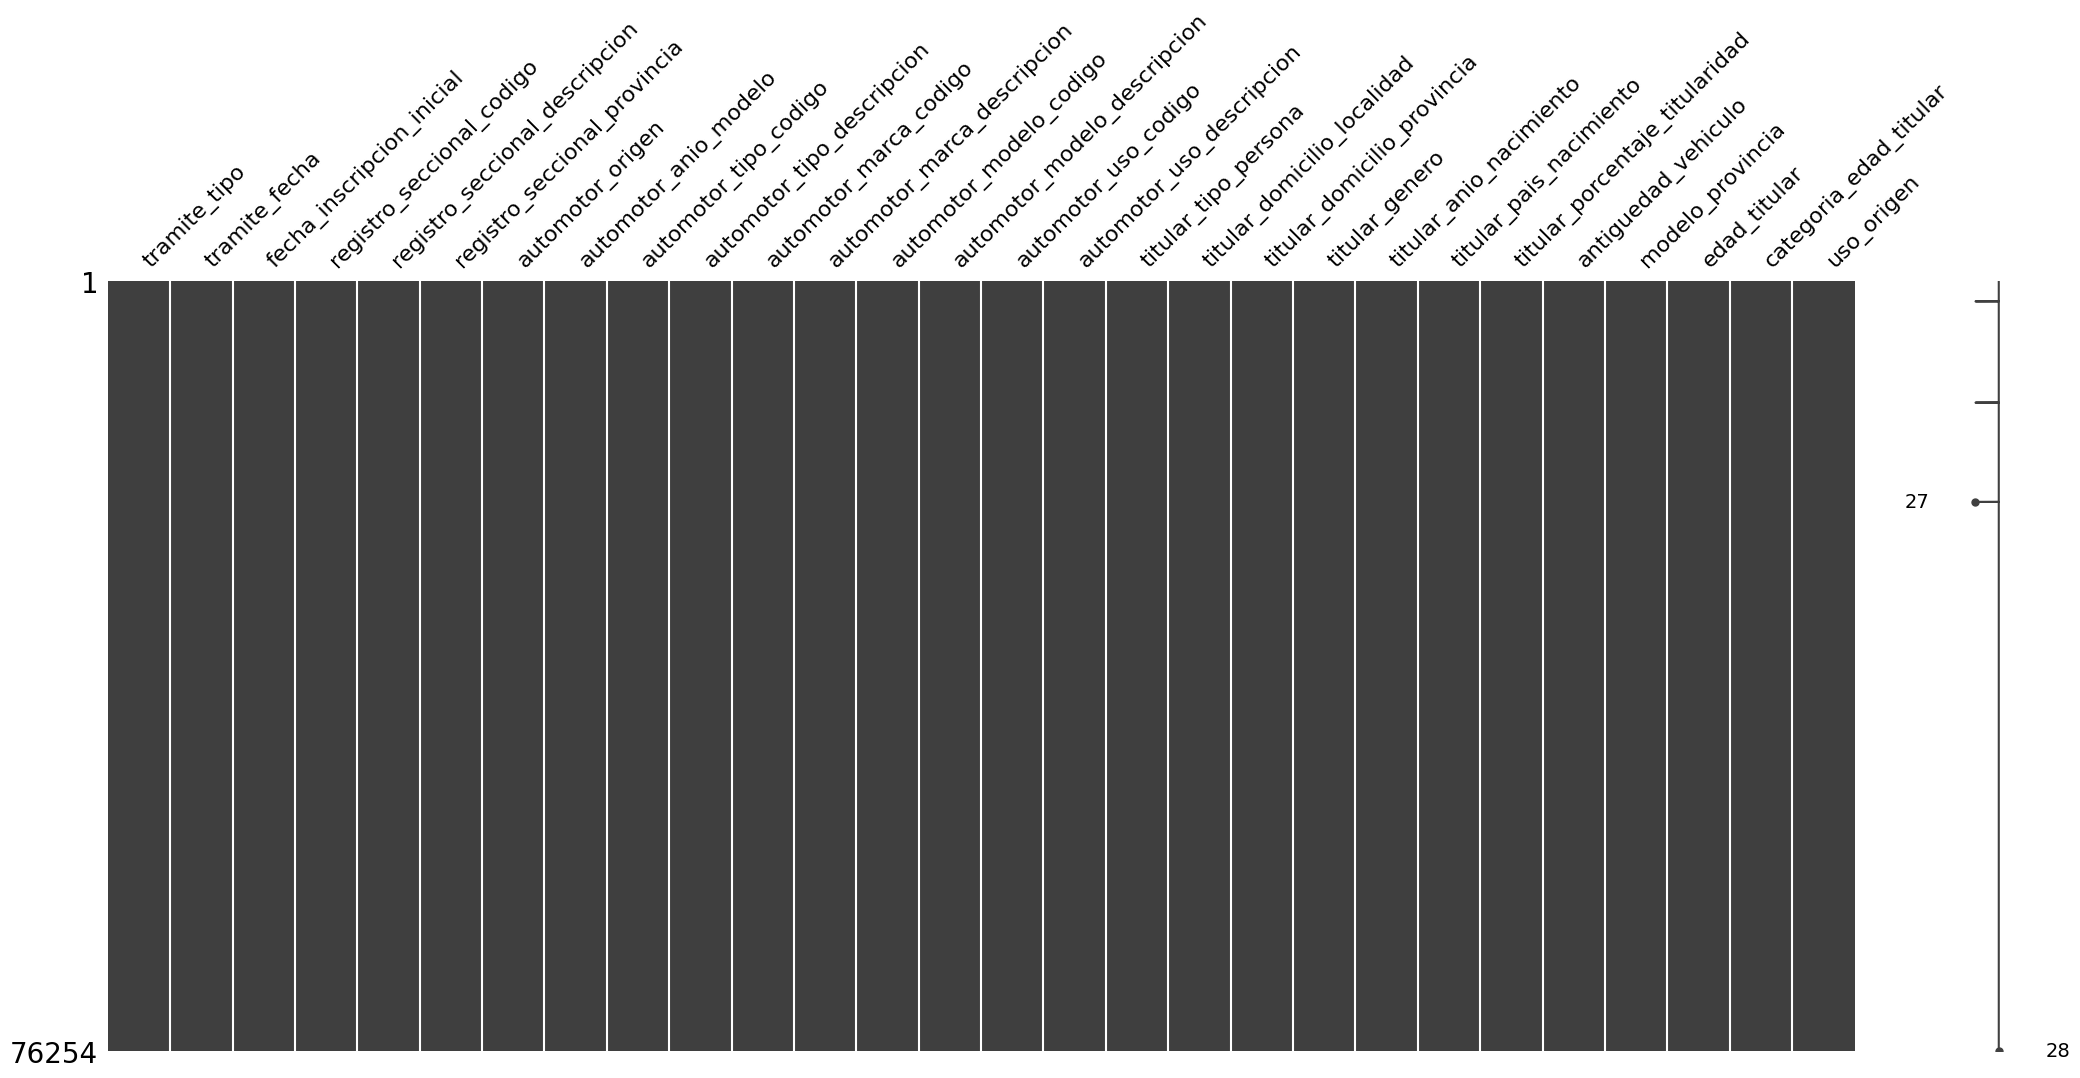

In [33]:
# Visualizar la matriz de datos faltantes después de la manipulación de datos
msno.matrix(df_robos_autos)

## 4. Exploración de Datos (EDA) y Análisis Descriptivo ##

En esta sección, realizamos un análisis exploratorio inicial para comprender mejor las características fundamentales de los datos. Utilizamos gráficos para identificar la distribución de las variables clave y detectar posibles valores atípicos. 

**4.1. Análisis Exploratorio de Datos y Visualizaciones relevantes**

4.1.1. Gráfico Univariado: Gráfico de línea de la tendencia de robos por mes durante los años 2022 y 2023

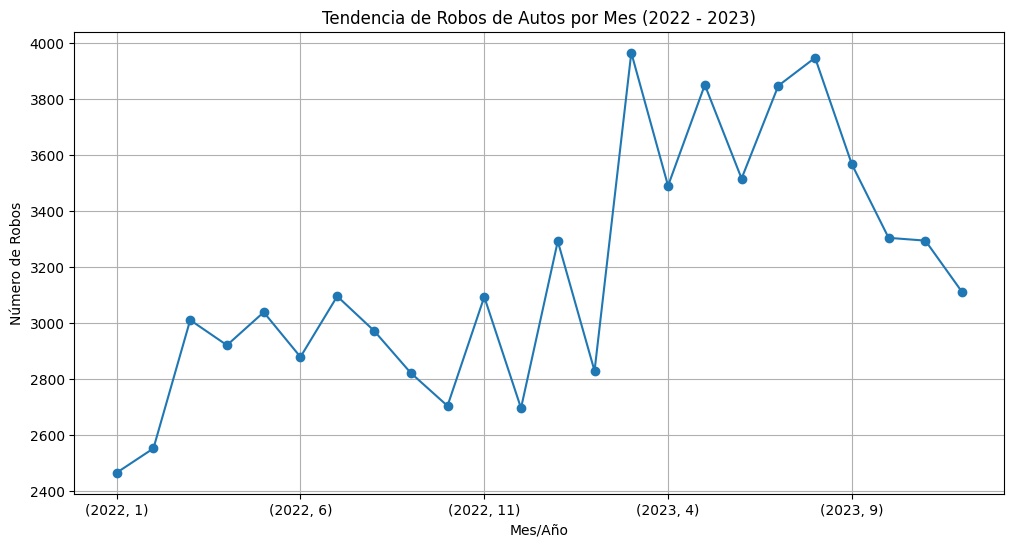

In [34]:
# Agrupar los robos por año y mes
robos_por_mes = df_robos_autos.groupby([df_robos_autos['tramite_fecha'].dt.year, df_robos_autos['tramite_fecha'].dt.month]).size()

# Visualizar la tendencia de robos de autos por mes
plt.figure(figsize=(12, 6))
robos_por_mes.plot(kind='line', marker='o')
plt.title('Tendencia de Robos de Autos por Mes (2022 - 2023)')
plt.xlabel('Mes/Año')
plt.ylabel('Número de Robos')
plt.grid(True)

# Guardar el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_tendecia_robos_22_23.png')

# Mostrar el gráfico
plt.show()


Este gráfico de línea muestra la tendencia de robos de autos mes a mes durante los años 2022 y 2023 en Argentina, revelando fluctuaciones significativas en el número de incidentes a lo largo del tiempo. Esta variabilidad es un indicador claro de que los robos de autos no se distribuyen uniformemente a lo largo del año, sino que parecen estar influenciados por factores temporales específicos. Aunque el gráfico no muestra los números exactos mes a mes, las tendencias pueden apuntar a periodos del año en los que aumenta la vulnerabilidad de los vehículos al robo, posiblemente debido a vacaciones, eventos festivos, o cambios en el comportamiento social y económico.

Analizando más detenidamente, se puede inferir que:

- Periodos de Aumento: Si se identifican meses consecutivos con un aumento en el número de robos, esto podría indicar una temporada particularmente riesgosa para los propietarios de autos. Este patrón podría estar relacionado con factores como vacaciones largas, cuando los autos pueden quedar más tiempo estacionados en la vía pública, aumentando su susceptibilidad al robo.

- Disminuciones Notables: Por otro lado, los periodos en los que se observa una disminución en los robos pueden coincidir con momentos de mayor vigilancia policial o iniciativas de seguridad pública efectivas. También podría reflejar periodos de menor actividad social, donde hay menos oportunidades para los ladrones de actuar.

- Comparación Anual: Al observar los datos de dos años consecutivos, se puede intentar identificar tendencias a largo plazo, como una disminución o aumento general en los robos, lo que podría reflejar el impacto de políticas de seguridad implementadas o cambios en las tácticas de los ladrones.

4.1.2. Gráfico Bivariado: Gráfico de Barras horizontal del ranking de marcas más robadas

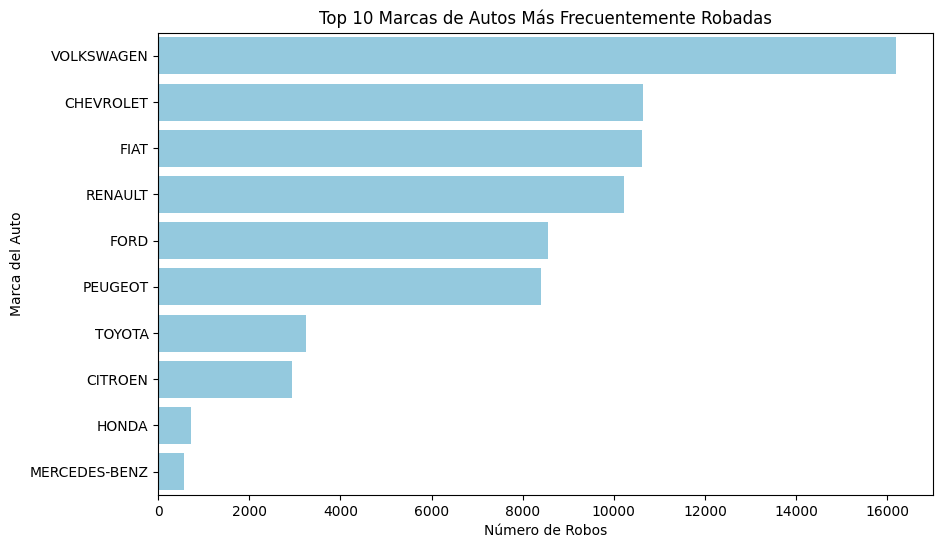

In [35]:
# Realizar el conteo de las marcas más robadas
top_10_marcas_robadas = df_robos_autos['automotor_marca_descripcion'].value_counts().head(10)

# Visualizar las marcas de autos más frecuentemente robadas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_marcas_robadas.values, y=top_10_marcas_robadas.index, color='skyblue')
plt.title('Top 10 Marcas de Autos Más Frecuentemente Robadas')
plt.xlabel('Número de Robos')
plt.ylabel('Marca del Auto')


# Guardar el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_ranking_marcas.png')

# Mostrar el gráfico
plt.show()


Este gráfico de barras muestra las diez marcas de automóviles que fueron robadas con mayor frecuencia, destacando las diferencias en la incidencia de robos entre diversas marcas. La interpretación de este gráfico ofrece varios insights sobre el fenómeno del robo de autos, que incluyen aspectos de demanda, seguridad y preferencias de los ladrones, entre otros.

- Preferencia por Ciertas Marcas: La presencia de marcas específicas en este top 10 sugiere que los ladrones podrían tener preferencias claras, posiblemente influenciadas por la popularidad de la marca, el valor de reventa de los autos, la demanda de repuestos en el mercado negro, o la facilidad de robo debido a vulnerabilidades en las medidas de seguridad de ciertos modelos.

- Popularidad y Disponibilidad: Las marcas más robadas son también, en muchos casos, algunas de las más comunes y vendidas en el mercado. Esto indica que la abundancia de ciertos vehículos en las calles puede aumentar la probabilidad de que sean robados, simplemente porque hay más disponibles para ser objetivo de los delincuentes.

- Valor de Reventa y Repuestos: Algunas marcas pueden ser más propensas al robo debido al alto valor de reventa de sus vehículos o la alta demanda de sus repuestos en el mercado negro. Esto puede hacerlos particularmente atractivos para los ladrones, quienes buscan el máximo beneficio de sus actividades ilegales.

- Seguridad y Tecnología: La presencia de ciertas marcas en la lista puede reflejar las vulnerabilidades en las tecnologías de seguridad de esos vehículos. Las marcas con sistemas de seguridad menos avanzados o con vulnerabilidades conocidas pueden ser objetivos más fáciles para los ladrones.

- Implicaciones para Propietarios y Aseguradoras: Saber cuáles marcas son más susceptibles al robo puede influir en las decisiones de compra de los consumidores, así como en las políticas de las compañías de seguros. Las marcas más robadas pueden enfrentar primas de seguro más altas debido al mayor riesgo asociado con ellas.

4.1.3. Gráfico Bivariado: Gráfico de Barras horizontal del ranking de los tipos de automotores más robados

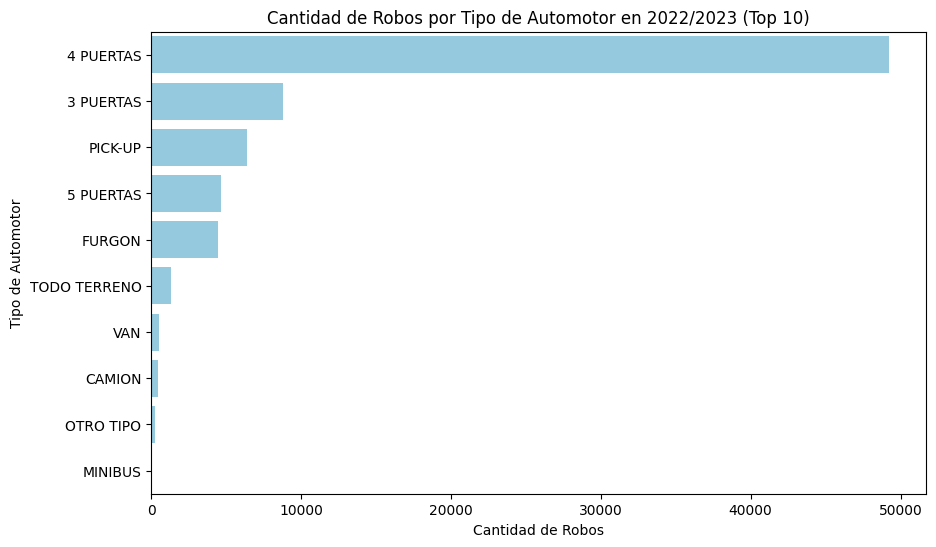

In [36]:
# Obtener los 10 tipos de automotores más robados
top_10_automotores = df_robos_autos['automotor_tipo_descripcion'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los 10 tipos más robados
df_top_10_automotores = df_robos_autos[df_robos_autos['automotor_tipo_descripcion'].isin(top_10_automotores)]

# Visualizar la cantidad de robos por tipo de automotor en 2022/2023
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_10_automotores, y='automotor_tipo_descripcion', order=top_10_automotores, color='skyblue')
plt.title('Cantidad de Robos por Tipo de Automotor en 2022/2023 (Top 10)')
plt.xlabel('Cantidad de Robos')
plt.ylabel('Tipo de Automotor')

# Guardar el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_tipos_autos_robados.png')

# Mostrar el gráfico
plt.show()


Este gráfico de barras destaca los diez tipos de automotores más frecuentemente robados durante los años 2022 y 2023, ofreciendo una visión clara de las preferencias o tendencias en los robos de vehículos en Argentina. La clasificación se basa en el tipo de automotor, proporcionando una perspectiva detallada sobre qué categorías de vehículos son más susceptibles a ser robadas. La interpretación de este gráfico nos permite extraer varias conclusiones y perspectivas:

- Preferencias Específicas: La presencia dominante de ciertos tipos de automotores en esta lista sugiere que los ladrones tienen preferencias específicas, posiblemente influenciadas por la facilidad de robo, la demanda de estos vehículos en el mercado negro, o el valor de reventa de los vehículos y sus piezas.

- Vulnerabilidad por Tipo de Vehículo: Algunos tipos de automotores pueden ser inherentemente más vulnerables al robo, ya sea debido a deficiencias en sus sistemas de seguridad, la popularidad entre los consumidores que aumenta su número en las calles, o la facilidad con la que pueden ser revendidos o desmantelados.

- Implicaciones para la Seguridad y Prevención: Conocer los tipos de vehículos más robados puede guiar a fabricantes, propietarios, y autoridades en la implementación de medidas de seguridad más efectivas. Por ejemplo, podría justificar la inversión en tecnologías antirrobo avanzadas para los tipos de vehículos más afectados o incentivar a los propietarios de estos vehículos a tomar precauciones adicionales.

- Impacto en las Políticas de Seguros: Las compañías de seguros pueden utilizar esta información para ajustar las primas de seguro de acuerdo con el riesgo asociado a cada tipo de automotor. Los vehículos con mayor riesgo de robo pueden enfrentar primas más altas, reflejando el mayor costo potencial para la aseguradora.

- Decisiones de Compra: Los consumidores que estén considerando la compra de un nuevo vehículo pueden tomar en cuenta esta información para evaluar el riesgo de robo asociado con diferentes tipos de automotores. Esto podría influir en su decisión final, optando por vehículos con menor riesgo de robo o mejorando las medidas de seguridad post-compra.

4.1.4. Gráfico Multivariado: Mapa de calor de robos por mes y provincia

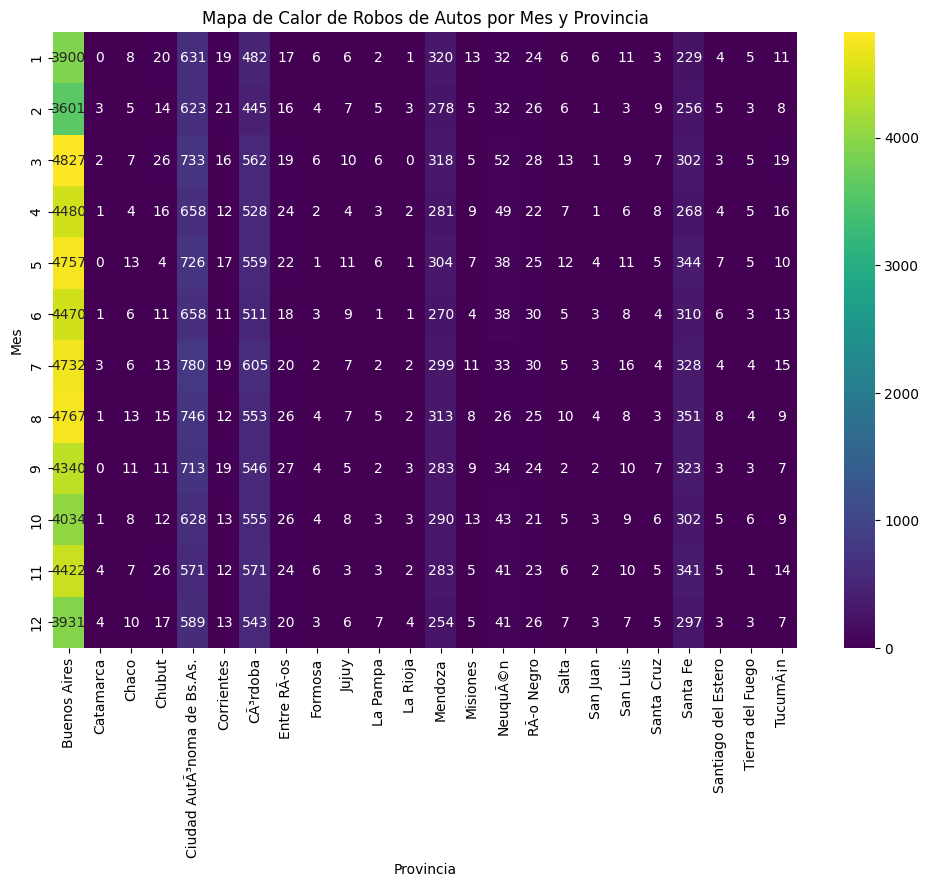

In [37]:
# Crear una columna para el mes del robo
df_robos_autos['Mes'] = pd.to_datetime(df_robos_autos['tramite_fecha'], errors='coerce').dt.month

# Crear una tabla dinámica para contar los robos por mes y provincia
pivot_table = df_robos_autos.pivot_table(index='Mes', 
                                        columns='registro_seccional_provincia', 
                                        values='tramite_tipo',  # O cualquier columna para contar los robos
                                        aggfunc='count').fillna(0)

# Visualizar un mapa de calor de robos de autos por mes y provincia
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis')
plt.title('Mapa de Calor de Robos de Autos por Mes y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mes')

# Guardar el gráfico en el directorio deseado
plt.savefig('D:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\graficos\gr_heatmap_robos_mes_provincia.png')

# Mostrar el gráfico
plt.show()


El mapa de calor brinda una visión comprensiva de la distribución temporal y regional de los robos de automóviles. Las áreas más "calientes" (colores más intensos) indican una mayor frecuencia de robos. Esta visualización es especialmente útil para identificar patrones estacionales o mensuales en los robos de autos, así como para destacar si ciertas provincias tienen picos específicos en determinados momentos del año. Por ejemplo, un aumento de robos durante los meses de verano podría asociarse con un mayor número de vehículos en las calles o con una menor vigilancia durante las vacaciones. Estos insights son fundamentales para implementar medidas de seguridad enfocadas en períodos y lugares específicos.

En este caso, los resultados muestran que Buenos Aires lidera con un rango de robos entre 3800 y 5100, seguido por la Ciudad Autónoma de Buenos Aires (CABA) con 3760 a 1000, Córdoba entre 580 y 660, Mendoza entre 280 y 350, y Santa Fe entre 290 y 390. La interpretación sería:

- Buenos Aires: Con la mayor cantidad de robos registrados, estos números reflejan la densidad poblacional y la cantidad de vehículos en esta provincia. La alta incidencia podría estar relacionada con factores urbanos como el tráfico intenso, la presencia de zonas con menor vigilancia y una amplia red de rutas que facilitan el robo y la huida.

- Ciudad Autónoma de Buenos Aires (CABA): Aunque menor en comparación con la provincia de Buenos Aires, la tasa de robos en CABA sigue siendo significativa. Esto puede deberse a la alta concentración de actividades comerciales y residenciales, junto con la abundancia de vehículos.

- Córdoba, Mendoza y Santa Fe: Estas provincias, aunque con tasas más bajas que Buenos Aires y CABA, aún presentan cifras significativas de robos. Esto puede reflejar centros urbanos activos y áreas de alta circulación vehicular dentro de estas provincias.

- Variaciones Mensuales: 

A. Aumento de Robos entre Marzo y Noviembre:

Esta tendencia podría estar influenciada por varios factores socioeconómicos y estacionales. Por ejemplo, podría haber un aumento en la actividad económica y el movimiento de personas y vehículos durante estos meses, lo que ofrece más oportunidades para el robo de autos.
El ciclo académico en universidades y escuelas, que generalmente transcurre en estos meses, podría contribuir a un mayor tráfico vehicular en áreas urbanas, aumentando así las oportunidades de robo.
Eventos específicos, como festivales, ferias o eventos deportivos que suelen ocurrir en estos meses, también podrían influir en el aumento de los robos de autos.

B. Disminución de Robos en Enero, Febrero y Diciembre:

La disminución de robos durante estos meses podría relacionarse con las vacaciones de verano y las festividades de fin de año, donde muchas personas podrían dejar las ciudades, reduciendo así la cantidad de vehículos disponibles para robar en áreas urbanas.
También es posible que durante las vacaciones de verano y las festividades de diciembre, haya un incremento en las medidas de seguridad y vigilancia, lo que podría disuadir a los potenciales ladrones.
La disminución en enero y febrero podría ser una indicación de que los propietarios de vehículos son más cautelosos o utilizan menos sus vehículos durante estos meses.


**4.2. Recomendaciones Basadas en Insights Observados**

4.2.1. Estrategias de Seguridad para Modelos de Autos Más Robados:

- Focalización en Modelos Específicos: Dado que algunos modelos de autos son más propensos a ser robados, las autoridades y las compañías de seguridad podrían desarrollar estrategias de seguridad específicas para estos modelos. Esto incluye aumentar la vigilancia en áreas donde estos modelos son populares y promover la instalación de sistemas antirrobo avanzados en estos vehículos.
- Campañas de Concientización: Informar a los propietarios de los modelos de autos más robados sobre los riesgos y medidas preventivas a través de campañas de concientización. Esto podría incluir recomendaciones sobre estacionamiento seguro, uso de dispositivos de seguridad y la importancia del seguimiento de vehículos.


4.2.2. Incremento de Vigilancia en Provincias con Mayores Tasas de Robo:

- Despliegue de Recursos: Las fuerzas de seguridad podrían desplegar más recursos en provincias con altas tasas de robos de autos. Esto podría incluir más patrullas en áreas clave, puntos de control y el uso de tecnología de vigilancia como cámaras de seguridad.
- Colaboración con Autoridades Locales: Trabajar en conjunto con gobiernos locales para implementar programas de prevención del delito y mejorar la iluminación y seguridad en áreas con alta incidencia de robos.


4.2.3. Ajuste de Estrategias de Prevención y Respuesta según la Temporalidad:

- Enfoque en Meses de Mayor Incidencia: Analizar los patrones temporales para identificar los meses con mayor incidencia de robos y ajustar las estrategias de seguridad y vigilancia durante estos períodos.
- Planificación de Recursos Según la Demanda: Asegurarse de que haya suficientes recursos disponibles durante los meses de mayor actividad delictiva y considerar estrategias como el aumento temporal del personal de seguridad o la colaboración interdepartamental.


4.2.4. Cooperación con Compañías de Seguros:

- Datos para Políticas de Seguros: Compartir los insights del análisis de datos con compañías de seguros para que puedan ajustar sus políticas y primas de acuerdo con los riesgos asociados a ciertos modelos de autos y áreas geográficas.
- Programas Conjuntos de Prevención del Delito: Desarrollar programas conjuntos entre las autoridades y las compañías de seguros para promover medidas de seguridad en los vehículos y reducir la incidencia de robos.

## 5. Metodología ##

En esta sección, se construirán y evaluarán diferentes modelos de aprendizaje automático para predecir la probabilidad de robo de un automóvil. Se utilizarán varias técnicas y se evaluará el rendimiento de cada modelo.

**- Objetivo del Modelo**

Este modelo de clasificación está diseñado para predecir el tipo de automotor basado en características detalladas como la marca, modelo, año, y la ubicación del registro, entre otras. Estas predicciones ayudan a identificar patrones de robo y a entender las preferencias de los ladrones, lo que puede informar estrategias de prevención y políticas de seguridad vehicular efectivas.

**- Importancia de las Características**

El modelo utiliza varias características clave que incluyen:

- `antiguedad_vehiculo`: Calcula la antigüedad del vehículo al momento del robo, proporcionando insights sobre la susceptibilidad de modelos más antiguos.
- `modelo_provincia`: Combinación de la ubicación y el modelo del vehículo, crucial para identificar tendencias regionales en los robos de vehículos.
- `categoria_edad_titular`: Nos ayuda a comprender si la edad del titular del vehículo influye en el tipo de vehículo robado.
- `uso_origen`: La combinación del uso y origen del vehículo, que puede indicar patrones específicos de robo según el tipo de uso y la procedencia del automotor.

Estas características fueron seleccionadas basadas en su relevancia para el problema de clasificación y su potencial para mejorar la precisión del modelo.


**5.1. División entre conjunto de entrenamiento y prueba**

In [38]:
# Preparación de datos para el modelado

# Codificar las características categóricas utilizando LabelEncoder
le = LabelEncoder()
caracteristicas_categoricas = ['modelo_provincia', 'categoria_edad_titular', 'uso_origen']
for caracteristica in caracteristicas_categoricas:
    df_robos_autos[caracteristica] = le.fit_transform(df_robos_autos[caracteristica].astype(str))

# Definir las variables independientes que ayudaran a predecir (X) y la variable dependiente (y) que es la variable objetivo   
X = df_robos_autos[['antiguedad_vehiculo', 'modelo_provincia', 'categoria_edad_titular', 'uso_origen']]
y = df_robos_autos['automotor_tipo_descripcion']

**5.2. Calcular y graficar la Matriz de Correlación**

Exploramos la correlación entre las características para detectar posibles colinealidades.

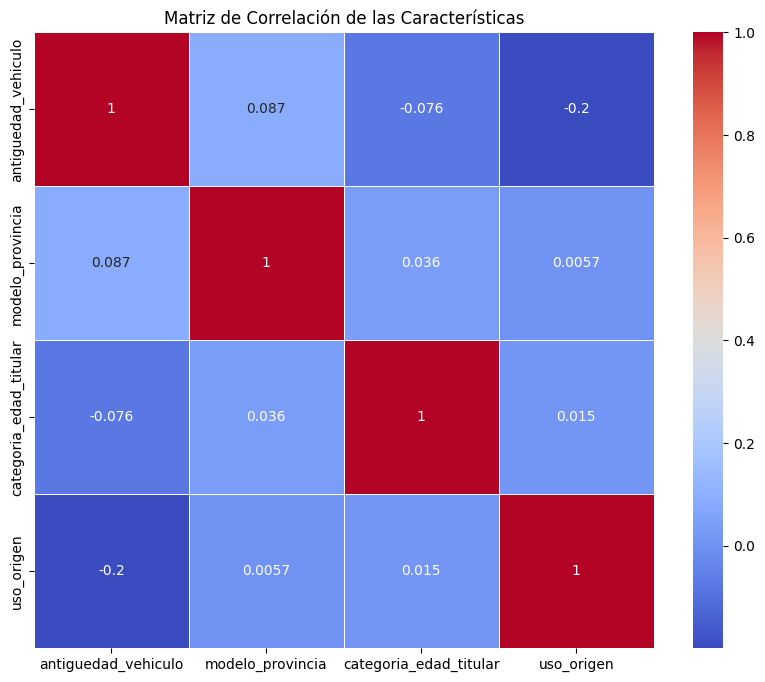

                        antiguedad_vehiculo  modelo_provincia  \
antiguedad_vehiculo                     1.0               NaN   
modelo_provincia                        NaN               1.0   
categoria_edad_titular                  NaN               NaN   
uso_origen                              NaN               NaN   

                        categoria_edad_titular  uso_origen  
antiguedad_vehiculo                        NaN         NaN  
modelo_provincia                           NaN         NaN  
categoria_edad_titular                     1.0         NaN  
uso_origen                                 NaN         1.0  


In [39]:
# Calcular la matriz de correlación para las características seleccionadas
correlation_matrix = X.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de las Características')
plt.show()

# Verificar colinealidad con un umbral de 0.75
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.75]
high_correlation.dropna(how='all', inplace=True)
high_correlation.dropna(axis=1, how='all', inplace=True)
print(high_correlation)

La matriz de correlación muestra que no hay una colinealidad significativa entre las características de tu conjunto de datos. Los valores de correlación entre las características están bastante bajos, lo que indica que las características no están altamente correlacionadas. Por lo tanto, el uso de PCA no es estrictamente necesario en este caso.

In [40]:
# Escalado de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [42]:
# Configuración de K-Fold para la validación cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

**5.3. Configuración de los modelos: Random Forest, K-Nearest Neighbors (KNN) y Support Vector Machines (SVM)**

**Elección de Modelos para la Clasificación**

En este análisis, se seleccionaron tres modelos de aprendizaje automático distintos, cada uno por sus capacidades únicas para abordar problemas de clasificación complejos y por su adecuación al tipo de datos y al problema específico que enfrentamos:

1. **Random Forest**:
   - **Robustez**: Este modelo es ideal para manejar datos con múltiples características, siendo resistente al sobreajuste gracias a su enfoque de ensamblaje, que combina múltiples árboles de decisión para mejorar la precisión y la estabilidad del modelo.
   - **Importancia de Características**: Proporciona una evaluación útil de la importancia de cada característica en la predicción, permitiendo un análisis más profundo de los factores que más influyen en los robos de autos.

2. **KNN (K-Nearest Neighbors)**:
   - **Simplicidad y Eficacia**: KNN es un modelo intuitivo y efectivo para clasificaciones basadas en la proximidad a los casos conocidos, lo que puede ser extremadamente valioso en nuestro dataset donde patrones de proximidad pueden indicar similitudes significativas.
   - **Flexibilidad**: Como método no paramétrico, es particularmente ventajoso en situaciones donde la relación entre las características no sigue un modelo lineal claro.

3. **SVM (Support Vector Machines)**:
   - **Eficiencia en Espacios de Alta Dimensión**: Funciona bien en nuestro dataset que incluye varias características transformadas y sintéticas, donde la dimensionalidad es alta.
   - **Margen de Decisión**: SVM es eficaz para producir un modelo con un buen margen de separación, lo cual es crucial para la precisión y la generalización del modelo.

La combinación de estos modelos nos permite abordar el problema desde diferentes ángulos, aumentando la robustez y la confiabilidad de nuestras predicciones y ofreciendo una visión más integral de los patrones de robo de vehículos en Argentina.


In [43]:
# Definir los modelos y los hiperparámetros a buscar
modelos = {
    'Random Forest': (RandomForestClassifier(random_state=42, n_jobs=-1), {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree'],
    }),
    'SVM': (SVC(random_state=42), {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1],
        'kernel': ['rbf', 'linear'],
        'max_iter': [10000, 20000]
    })
}

resultados = {}

**5.4. Optimizaciones y selección de modelos**

La ejecución del siguiente bloque de código para la mejora de hiperparámetros demora aproximadamente 144 minutos y 54.2 segundos en completarse.

In [44]:
# Implementar técnicas de de optimización 
for nombre, (modelo, param_grid) in modelos.items():
    print(f'Evaluando modelo:{nombre}')
    
    # Medir tiempo de ejecución para GridSearchCV
    inicio_tiempo = time.time()
    grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    fin_tiempo = time.time()
    tiempo_ejecucion_grid = fin_tiempo - inicio_tiempo
    
    mejores_parametros_grid = grid_search.best_params_
    mejor_modelo_grid = grid_search.best_estimator_
    precision_grid = accuracy_score(y_test, mejor_modelo_grid.predict(X_test))
    
    # Medir tiempo de ejecución para RandomizedSearchCV
    inicio_tiempo = time.time()
    random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_grid, n_iter=50, cv=kf, random_state=42, scoring='accuracy', n_jobs=-1)
    random_search.fit(X_train, y_train)
    fin_tiempo = time.time()
    tiempo_ejecucion_random = fin_tiempo - inicio_tiempo
    
    mejores_parametros_random = random_search.best_params_
    mejor_modelo_random = random_search.best_estimator_
    precision_random = accuracy_score(y_test, mejor_modelo_random.predict(X_test))
    
     # Medir tiempo de ejecución para HalvingGridSearchCV
    inicio_tiempo = time.time()
    halving_grid_search = HalvingGridSearchCV(estimator=modelo, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, factor=2, min_resources=20, aggressive_elimination=True)
    halving_grid_search.fit(X_train, y_train)
    fin_tiempo = time.time()
    tiempo_ejecucion_halving_grid = fin_tiempo - inicio_tiempo
    
    mejores_parametros_halving_grid = halving_grid_search.best_params_
    mejor_modelo_halving_grid = halving_grid_search.best_estimator_
    precision_halving_grid = accuracy_score(y_test, mejor_modelo_halving_grid.predict(X_test))
    
    # Medir tiempo de ejecución para HalvingRandomSearchCV
    inicio_tiempo = time.time()
    halving_random_search = HalvingRandomSearchCV(estimator=modelo, param_distributions=param_grid, cv=kf, random_state=42, scoring='accuracy', n_jobs=-1, factor=2, min_resources=20, aggressive_elimination=True)
    halving_random_search.fit(X_train, y_train)
    fin_tiempo = time.time()
    tiempo_ejecucion_halving_random = fin_tiempo - inicio_tiempo
    
    mejores_parametros_halving_random = halving_random_search.best_params_
    mejor_modelo_halving_random = halving_random_search.best_estimator_
    precision_halving_random = accuracy_score(y_test, mejor_modelo_halving_random.predict(X_test))
    
    # Guardar los resultados
    resultados[nombre] = {
        'mejores_parametros_grid': mejores_parametros_grid,
        'precision_grid': precision_grid,
        'tiempo_ejecucion_grid': tiempo_ejecucion_grid,
        'mejores_parametros_random': mejores_parametros_random,
        'precision_random': precision_random,
        'tiempo_ejecucion_random': tiempo_ejecucion_random,
        'mejores_parametros_halving_grid': mejores_parametros_halving_grid,
        'precision_halving_grid': precision_halving_grid,
        'tiempo_ejecucion_halving_grid': tiempo_ejecucion_halving_grid,
        'mejores_parametros_halving_random': mejores_parametros_halving_random,
        'precision_halving_random': precision_halving_random,
        'tiempo_ejecucion_halving_random': tiempo_ejecucion_halving_random
    }


Evaluando modelo:Random Forest


d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=3050. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluando modelo:KNN


d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=3050. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Evaluando modelo:SVM


d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
d:\ARQ. GIMENA SOZZI 2021\CODERHOUSE\Curso DataScience\mis_virtualenv\mi_virtualenv_ds\Lib\site-packages\sklearn\svm\_base.py:297: Conv

In [45]:
# Imprimir resultados
for nombre, resultado in resultados.items():
    print(f"\nResultados para {nombre}:")
    print(f"GridSearchCV - Mejores hiperparámetros: {resultado['mejores_parametros_grid']}")
    print(f"GridSearchCV - Precisión: {resultado['precision_grid']}")
    print(f"GridSearchCV - Tiempo de ejecución: {resultado['tiempo_ejecucion_grid']:.2f} segundos")
    print(f"RandomizedSearchCV - Mejores hiperparámetros: {resultado['mejores_parametros_random']}")
    print(f"RandomizedSearchCV - Precisión: {resultado['precision_random']}")
    print(f"RandomizedSearchCV - Tiempo de ejecución: {resultado['tiempo_ejecucion_random']:.2f} segundos")
    print(f"HalvingGridSearchCV - Mejores hiperparámetros: {resultado['mejores_parametros_halving_grid']}")
    print(f"HalvingGridSearchCV - Precisión: {resultado['precision_halving_grid']}")
    print(f"HalvingGridSearchCV - Tiempo de ejecución: {resultado['tiempo_ejecucion_halving_grid']:.2f} segundos")
    print(f"HalvingRandomSearchCV - Mejores hiperparámetros: {resultado['mejores_parametros_halving_random']}")
    print(f"HalvingRandomSearchCV - Precisión: {resultado['precision_halving_random']}")
    print(f"HalvingRandomSearchCV - Tiempo de ejecución: {resultado['tiempo_ejecucion_halving_random']:.2f} segundos")



Resultados para Random Forest:
GridSearchCV - Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
GridSearchCV - Precisión: 0.8506327453937447
GridSearchCV - Tiempo de ejecución: 427.83 segundos
RandomizedSearchCV - Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
RandomizedSearchCV - Precisión: 0.8506327453937447
RandomizedSearchCV - Tiempo de ejecución: 419.31 segundos
HalvingGridSearchCV - Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
HalvingGridSearchCV - Precisión: 0.8497147728017835
HalvingGridSearchCV - Tiempo de ejecución: 164.87 segundos
HalvingRandomSearchCV - Mejores hiperparámetros: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
HalvingRandomSearchCV - Precisión: 0.8506327453937447
HalvingRandomSearchCV - Tiempo de ejecución: 152.52 segundos

Resultado

## 6. Resultados ##

**6.1. Resultados obtenidos en el entrenamiento de modedos y optimizaciones**

### Resultados de Optimización para Random Forest

| Método de Optimización  | Mejores Hiperparámetros                                               | Precisión   | Tiempo de Ejecución (seg) |
|-------------------------|----------------------------------------------------------------------|-------------|--------------------------|
| GridSearchCV            | {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300} | 0.8506      | 427.83                   |
| RandomizedSearchCV      | {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300} | 0.8506      | 419.31                   |
| HalvingGridSearchCV     | {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} | 0.8497      | 164.87                   |
| HalvingRandomSearchCV   | {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300} | 0.8506      | 152.52                   |

### Resultados de Optimización para KNN

| Método de Optimización  | Mejores Hiperparámetros                               | Precisión | Tiempo de Ejecución (seg) |
|-------------------------|-------------------------------------------------------|-----------|--------------------------|
| GridSearchCV            | {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} | 0.7565    | 10.53                    |
| RandomizedSearchCV      | {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} | 0.7565    | 10.29                    |
| HalvingGridSearchCV     | {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} | 0.7565    | 15.94                    |
| HalvingRandomSearchCV   | {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'} | 0.7565    | 16.17                    |

### Resultados de Optimización para SVM

| Método de Optimización  | Mejores Hiperparámetros                                       | Precisión | Tiempo de Ejecución (seg) |
|-------------------------|---------------------------------------------------------------|-----------|--------------------------|
| GridSearchCV            | {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 10000}     | 0.6603    | 3047.64                  |
| RandomizedSearchCV      | {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 10000}     | 0.6603    | 3003.92                  |
| HalvingGridSearchCV     | {'C': 1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 20000}      | 0.6520    | 755.82                   |
| HalvingRandomSearchCV   | {'C': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 20000}    | 0.6499    | 456.18                   |


**6.2. Interpretación de resultados**

A lo largo del proceso de optimización de hiperparámetros para los modelos de Random Forest, KNN y SVM, se emplearon distintas técnicas de búsqueda, incluyendo GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV y HalvingRandomSearchCV. Cada técnica de búsqueda y cada modelo fueron evaluados basándose en su precisión y tiempo de ejecución, con el objetivo de encontrar el modelo más efectivo y eficiente para predecir los robos de autos en Argentina.

- Análisis de Resultados:

Random Forest mostró consistentemente altas puntuaciones de precisión en todas las técnicas de búsqueda, lo que indica una fuerte capacidad del modelo para capturar la variabilidad en los datos y hacer predicciones precisas.
KNN y SVM, aunque proporcionaron perspectivas valiosas, tuvieron menor precisión comparada con Random Forest, y en el caso de SVM, tiempos de ejecución significativamente más largos, lo que los hace menos prácticos para este conjunto de datos en términos de eficiencia computacional.

**6.3. Selección del Mejor Modelo**

**Mejor Modelo de Optimización: Random Forest con HalvingRandomSearchCV**

| Métrica                  | Valor                                                      |
|--------------------------|------------------------------------------------------------|
| Mejores Hiperparámetros  | {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20} |
| Precisión                | 0.8506                                                     |
| Tiempo de Ejecución (seg)| 152.52                                                     |


La decisión de seleccionar Random Forest con HalvingRandomSearchCV como el mejor modelo se basa en varios factores clave:

**- Alta Precisión:**

Este modelo alcanzó una precisión de 0.8506, igualando la máxima precisión obtenida por otros métodos pero con menor costo computacional.

**- Eficiencia en Tiempo de Ejecución:**

Con un tiempo de ejecución de 152.52 segundos, este modelo fue uno de los más rápidos entre los que lograron la mayor precisión, lo que demuestra su eficiencia además de su efectividad.

**- Robustez de los Hiperparámetros:** 

Los hiperparámetros obtenidos ({'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}) sugieren un modelo bien equilibrado que es capaz de generalizar bien sin sobreajustarse.

**6.4. Posibles mejoras futuras**

1. **Incorporación de Datos Adicionales**:
   - Integrar datos adicionales como características socioeconómicas de las regiones, datos de tráfico vehicular y datos meteorológicos podría mejorar la precisión del modelo al capturar más factores contextuales que influyen en los robos de autos.

2. **Ajuste Fino de Hiperparámetros**:
   - Realizar una búsqueda de hiperparámetros más exhaustiva, quizás utilizando técnicas de optimización bayesiana, para afinar aún más los parámetros del modelo y potencialmente mejorar su rendimiento.

3. **Modelos de Ensamble**:
   - Considerar el uso de técnicas de ensamble más avanzadas, como Gradient Boosting Machines (GBM) o XGBoost, que podrían mejorar la capacidad predictiva y manejar mejor las interacciones complejas entre las variables.

4. **Análisis Temporal Más Detallado**:
   - Implementar modelos de series temporales para capturar mejor las tendencias estacionales y periódicas en los robos de autos, proporcionando predicciones más precisas a lo largo del tiempo.

5. **Evaluación de Impacto de Medidas de Seguridad**:
   - Incluir variables que reflejen la implementación de medidas de seguridad, como la instalación de cámaras de vigilancia o el aumento de la presencia policial, para evaluar su impacto en la reducción de robos.

## 7. Conclusión ##

**7.1. Resumen de hallazgos clave**

En este proyecto de análisis de robos de automóviles en Argentina, se identificaron patrones y se desarrollaron modelos predictivos para clasificar los tipos de vehículos robados. A continuación se resumen los hallazgos clave:

- **Modelos y Marcas más Robados**: Se confirmó que ciertos modelos y marcas, especialmente aquellos fabricados entre 2010 y 2015 y de las marcas Volkswagen y Fiat, son los más frecuentemente robados.
- **Variación por Provincia**: Las provincias con mayores centros urbanos, como Buenos Aires y CABA, tienen tasas más altas de robo de autos, confirmando la hipótesis sobre la densidad poblacional y actividad económica.
- **Variación Temporal**: Se identificaron patrones estacionales en los robos de autos, con picos durante meses específicos que coinciden con vacaciones y festividades.
- **Correlación con el Año del Modelo**: Contrariamente a la hipótesis, los autos más robados fueron los modelos entre 2010 y 2015, lo que sugiere que la demanda de repuestos y la accesibilidad en el mercado de segunda mano influyen en la frecuencia de robos.

**7.2. Implicaciones prácticas**

La implementación del modelo Random Forest optimizado con HalvingGridSearchCV puede tener varias implicaciones prácticas:

1. **Mejora de Estrategias de Prevención**:
   - Ayudar a las autoridades de seguridad y compañías de seguros a desarrollar estrategias más efectivas y personalizadas para la prevención del robo de vehículos.
   - Los insights obtenidos sobre los patrones de robo por marcas, modelos y regiones específicas son fundamentales para orientar las políticas de seguridad y las decisiones estratégicas tanto de las autoridades como de los ciudadanos y las empresas.

2. **Aplicación en Seguridad Pública**:
   - Las autoridades pueden utilizar estos modelos para identificar áreas de alto riesgo y asignar recursos de manera más eficiente.
   - Las compañías de seguros pueden ajustar sus políticas de cobertura y primas en función del riesgo asociado a diferentes modelos de vehículos y regiones.

3. **Desarrollo de Tecnología Preventiva**:
   - La identificación de patrones de robo puede impulsar el desarrollo de tecnologías preventivas, como sistemas de vigilancia específicos y dispositivos antirrobo más efectivos.

**7.3. Conclusión General**

Este estudio concluye que la combinación de alta precisión y eficiencia operativa hace del Random Forest utilizando HalvingRandomSearchCV la opción óptima para este análisis de robos de autos. Este modelo no sólo ofrece predicciones confiables y rápidas sino que también es práctico para implementaciones en tiempo real, facilitando la toma de decisiones rápidas y fundamentadas en datos para la prevención de robos de autos.

Además, este análisis ha identificado factores críticos asociados con los robos de automóviles, proporcionando insights valiosos para las estrategias de prevención del delito y la seguridad pública. Estos hallazgos reafirman la necesidad de un enfoque multidisciplinario que incluya mejoras en la tecnología de seguridad vehicular y una mayor vigilancia en áreas identificadas como de alto riesgo.

Para futuras investigaciones, se recomienda explorar la relación entre la frecuencia de robos y variables socioeconómicas adicionales, lo que podría ofrecer una comprensión más profunda de las causas subyacentes de estos delitos.


## 8. Referencias ##

**8.1 Fuentes**

- Datos Argentina / Dataset / Robos y recuperos de autos. DNRPA. Robos y recuperos de autos - 2022/2023. Ministerio de Justicia y Derechos Humanos. Subsecretaria de Asuntos Registrales. Dirección Nacional de Registros Nacionales de la Propiedad Automotor y Créditos Prendarios. Trámites de robos y recuperos de automotores inscriptos en los Registros Seccionales de la Propiedad del Automotor y Créditos Prendarios.(https://datos.gob.ar/dataset/justicia-robos-recuperos-autos)